In [2]:
from src import utils
imgs, labels = utils.load_imgs('../Wild Cats Dataset', ['CHEETAH' ,'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER'])
x, y = utils.make_dataset(imgs, labels, utils.label_to_idx, (224,224))
print('x shape: {}, y shape:{}'.format(x.shape, y.shape))
# utils.plot_sample(imgs, labels, 5, 5, resize=(224, 224))

Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
x shape: (1620, 224, 224, 3), y shape:(1620, 7)


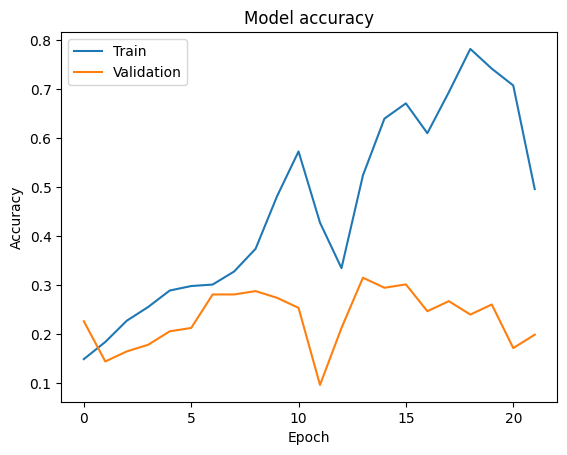

Accuracy: 30.8642%



In [3]:
################### Task 1 ###################
# Solution go here
from src import utils
from tensorflow import keras
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import warnings
import os

# Ignores warnings
warnings.filterwarnings('ignore')

# ------- 1, 2 -------
X = x / 255

keras.utils.set_random_seed(0)

# ------ 3, 4 -------
# Splits dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=0, shuffle=True)

# Creates the network
network = utils.create_FFNN(input_shape=x_train.shape[1:])

# Early Stopping callback. Restores best weights to save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=6, verbose=0, restore_best_weights=True)

# Train the network
history = network.fit(x_train, y_train,
              epochs=50,
              batch_size=64,
              validation_split=0.1,
              callbacks=[early_stopping],
              verbose=0)

# Plot the training history
utils.plot_history(history)

# Load the best model found so far
file_path = '../deliverable/T1.h5'
best_model = utils.load_keras_model(file_path)
_, best_model_accuracy = best_model.evaluate(x_test, y_test, verbose = 0)

# Evaluate the current model on test set
_, accuracy = network.evaluate(x_test, y_test, verbose = 0)
print("Accuracy: {:.4f}".format(accuracy * 100) + "%\n")

# Saves best model if the accuracy improved or there is no saved model
if accuracy > best_model_accuracy or not os.path.isfile(file_path):
    print('\n(T1): Model improved... saving new best model\n')
    utils.save_keras_model(network, file_path)

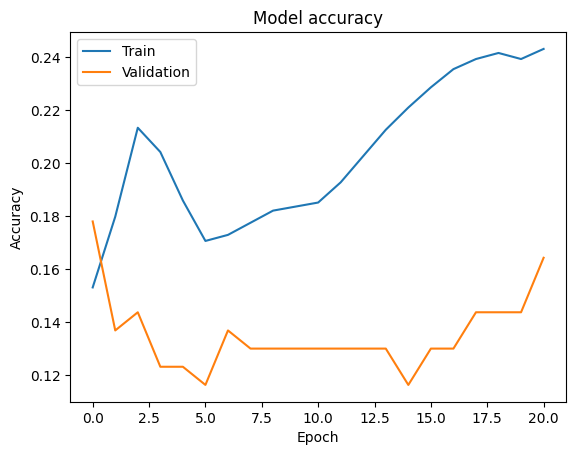

Accuracy: 19.1358%



In [9]:
################### Task 1 Bonus ###################
# Solution go here
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from src import utils
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import warnings

# Ignores warnings
warnings.filterwarnings('ignore')

reshaped_data = x.reshape(x.shape[0], -1)

# Compute histograms for each sample
histograms = []
for sample in reshaped_data:
    hist, _ = np.histogram(sample, bins=256, range=[0, 256], density=True)
    histograms.append(hist)
histograms = np.array(histograms)

# Normalize histograms
scaler = MinMaxScaler()
normalized_histograms = scaler.fit_transform(histograms)

# Split dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(histograms, y, stratify=y, test_size=0.1, random_state=0, shuffle=True)

# Creates the network
ffnn = utils.create_FFNN(input_shape = (256,))

# Early Stopping callback. Restores best weights to save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)

# Train the network
history = ffnn.fit(x_train, y_train,
              epochs=500,
              batch_size=1024,
              validation_split=0.1,
              callbacks=[early_stopping],
              verbose=0)

# Plot the training history
utils.plot_history(history)

# Evaluate the current model on test set
_, accuracy = ffnn.evaluate(x_test, y_test, verbose = 0)
print("Accuracy: {:.4f}".format(accuracy * 100) + "%\n")

# Load the best model found so far
file_path = '../deliverable/T1_bonus.h5'
best_model = utils.load_keras_model(file_path)
_, best_model_accuracy = best_model.evaluate(x_test, y_test, verbose = 0)

# Saves best model if the accuracy improved or there is no saved model
if accuracy > best_model_accuracy or not os.path.isfile(file_path):
    print('\n(T1 Bonus): Model improved... saving new best model\n')
    utils.save_keras_model(ffnn, file_path)